In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
Data = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/test_X.npy")
label = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/test_Y.npy")

In [3]:
s = np.where((label[:,0] == 25.) & (label[:,1] == 0.3))

In [4]:
# Test for 25 degree, 0.3
Data_BoA25f0p3 = Data[s]

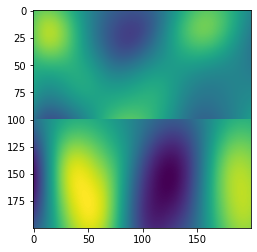

In [24]:
plt.imshow(Data_BoA25f0p3[0])

In [5]:
DataVecsTrain = np.zeros((40000,len(Data_BoA25f0p3)))

for i, d in enumerate(Data_BoA25f0p3):
    DataVecsTrain[:,i] = d.reshape(-1)

In [6]:
DataVecsTrain.shape

(40000, 55)

In [27]:
U.shape, S.shape, Vt.shape

((40000, 55), (55,), (55, 55))

In [28]:
rPODeach = 23 # 23 seems to be the least possible value - Is this because I have larger image???
# Uall = np.empty()

# for f in freq:
#     for a in alpha:
U, S, Vt = np.linalg.svd(DataVecsTrain, full_matrices=False)

plt.imshow(U@@Vt)

Library = U[:,:rPODeach]
# Uall = np.concatenate((Uall, U[:, :rPODeach]), axis=1)
# Sall = np.concatenate((Sall, np.diag(S[:rPODeach])), axis=0)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 55 is different from 1)

In [19]:
Library.shape

(40000, 25)

In [20]:
2*8*10

160

In [23]:
nModesSparse = 2*8*rPODeach
nModesSparse = rPODeach # because Im looking at only one case

# Theta = Uall[:, :nModesSparse]
s = cp.Variable(nModesSparse)
objective = cp.Minimize(cp.norm(s, 1))
constraints = [cp.norm(Library @ s - DataVecsTrain[:,0], 2) <= 0.0001]
prob = cp.Problem(objective, constraints)
prob.solve(solver = cp.MOSEK, verbose = True)

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 03:03:20 PM: Your problem has 25 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 03:03:20 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 03:03:20 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 03:03:20 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 03:03:20 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 03:03:20 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

SolverError: Solver 'MOSEK' failed. Try another solver, or solve with verbose=True for more information.

In [11]:
print(s.value)

None


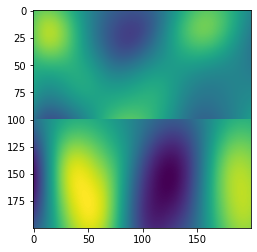

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [12]:
plt.imshow(DataVecsTrain[:,0].reshape(200,200))
plt.show()
rec = Library @ s.value
plt.imshow(rec.reshape(200,200))

# Now try for whole data

In [ ]:
Data = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/train_X.npy")
label = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/train_Y.npy")

In [ ]:
Counter(label[:,1])

In [ ]:
boa = [25., 30.]
freq = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

In [ ]:
np.where(label[:,0] == 25.)[0].shape[0]

## Make the Library

In [ ]:
s = np.where((label[:,0] == 25.) & (label[:,1] == 0.3))

Data_split = []

for b in boa:
    for f in freq:
        s = np.where((label[:,0] == b) & (label[:,1] == f))
        if s[0].shape[0] == 0:
            print(b, f)
            break
        Data_split.append(Data[s])

In [ ]:
# # Test for 25 degree, 0.3
# Data_BoA25f0p3 = Data[s]

In [ ]:
Library = np.empty((40000,0))

for cat in range(16):
    DataVecsTrain = np.zeros((40000, len(Data_split[cat])))

    for i, d in enumerate(Data_split[cat]):
        DataVecsTrain[:,i] = d.reshape(-1)
        
    rPODeach = 23
    U, S, Vt = np.linalg.svd(DataVecsTrain, full_matrices = False)
    Library = np.column_stack((Library, U[:,:rPODeach]))

In [ ]:
Library.shape

In [ ]:
368/23

## Test on data

In [ ]:
test_X = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/test_X.npy")
test_Y = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one thirds/test_Y.npy")

In [ ]:
test_X.shape

In [ ]:
nModesSparse = 2*8*rPODeach

# Theta = Uall[:, :nModesSparse]
s = cp.Variable(nModesSparse)
objective = cp.Minimize(cp.norm(s, 1))
constraints = [cp.norm(Library @ s - test_X[0].reshape(-1), 2) <= 0.0001]
prob = cp.Problem(objective, constraints)
prob.solve(verbose = True)

In [ ]:
ans = s.value

In [ ]:
23//23

In [ ]:
summations = []

for i in range(len(ans)):
    if i%23 == 0:
#         print(sum(ans[i-23:i]))
        summations.append(sum(ans[i-23:i]))

summations = np.array(summations)
print("Prediction :", np.argmax(summations)) # 25, 0.1

In [ ]:
test_Y[0]

# This takes way to much time. Let's try for 1/15 case

In [47]:
train_X = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one fifteenth/train_X.npy")
train_Y = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one fifteenth/train_Y.npy")

In [48]:
boa = [25., 30.]
freq = [0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]

## Make the Library

In [49]:
s = np.where((train_Y[:,0] == 25.) & (train_Y[:,1] == 0.3))

Data_split = []

for b in boa:
    for f in freq:
        s = np.where((train_Y[:,0] == b) & (train_Y[:,1] == f))
        if s[0].shape[0] == 0:
            print(b, f)
            break
        Data_split.append(Data[s])

In [50]:
# # Test for 25 degree, 0.3
# Data_BoA25f0p3 = Data[s]

In [51]:
Library = np.empty((1600,0))

for cat in range(16):
    DataVecsTrain = np.zeros((1600, len(Data_split[cat])))

    for i, d in enumerate(Data_split[cat]):
        DataVecsTrain[:,i] = d.reshape(-1)
        
    rPODeach = 10
    U, S, Vt = np.linalg.svd(DataVecsTrain, full_matrices = False)
    Library = np.column_stack((Library, U[:,:rPODeach]))

In [52]:
Library.shape

(1600, 160)

In [53]:
368/23

16.0

## Test

In [54]:
test_X = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one fifteenth/test_X.npy")
test_Y = np.load("/Volumes/KleeFD/dataset/window_normalized/Window Size/one fifteenth/test_Y.npy")

In [55]:
print(cp.installed_solvers())

['ECOS', 'ECOS_BB', 'MOSEK', 'OSQP', 'SCIPY']


In [56]:
nModesSparse = 2*8*rPODeach

answers = []

for i in range(100):
    s = cp.Variable(nModesSparse)
    objective = cp.Minimize(cp.norm(s, 1))
    constraints = [cp.norm(Library @ s - test_X[i].reshape(-1), 2) <= 0.0001]
    prob = cp.Problem(objective, constraints)
    prob.solve(solver = cp.MOSEK, verbose = True)
    
    answers.append(s.value)

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:23 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:23 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:23 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:23 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:23 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:23 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -8.689812357e-06  -4.098608284e+00  1.5e-01  0.04  
2   2.3e-02  1.8e-04  2.0e-04  -5.23e-01  4.515832843e-02   -1.179018541e+00  1.8e-04  0.05  
3   4.7e-03  3.7e-05  1.4e-05  9.92e-01   6.109789537e+00   5.974744179e+00   3.7e-05  0.05  
4   7.9e-04  6.2e-06  3.4e-07  9.94e-01   6.832686970e+00   6.829784355e+00   6.2e-06  0.06  
5   4.4e-04  3.5e-06  1.5e-07  9.67e-01   6.921038945e+00   6.919335612e+00   3.5e-06  0.07  
6   7.9e-05  6.2e-07  1.1e-08  9.80e-01   6.9680

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:23 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:23 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:23 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:23 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:23 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:23 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:24 AM: Finished problem compilation (took 5.475e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:24 AM: 

4   4.3e-03  3.4e-05  4.7e-06  9.72e-01   1.138211395e+01   1.136358202e+01   3.4e-05  0.06  
5   8.1e-04  6.4e-06  3.4e-07  9.70e-01   1.243596980e+01   1.243329360e+01   6.4e-06  0.06  
6   1.4e-04  1.1e-06  2.8e-08  9.24e-01   1.260425397e+01   1.260366297e+01   1.1e-06  0.07  
7   1.0e-04  8.0e-07  1.7e-08  8.29e-01   1.261913979e+01   1.261871405e+01   8.0e-07  0.07  
8   3.4e-05  2.7e-07  3.4e-09  9.59e-01   1.264090396e+01   1.264075208e+01   2.7e-07  0.08  
9   4.5e-06  3.5e-08  1.7e-10  9.78e-01   1.265129594e+01   1.265127381e+01   3.5e-08  0.08  
10  1.5e-06  1.2e-08  3.3e-11  9.76e-01   1.265215016e+01   1.265214273e+01   1.2e-08  0.09  
11  2.1e-07  1.6e-09  1.7e-12  9.94e-01   1.265256657e+01   1.265256549e+01   1.6e-09  0.09  
12  4.6e-10  3.6e-12  2.4e-16  1.00e+00   1.265261398e+01   1.265261398e+01   3.6e-12  0.10  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

(CVXPY) Oct 19 12:43:24 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:24 AM: Finished problem compilation (took 5.369e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:24 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering 

Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.0536775683e+01    nrm: 7e+02    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.0536775664e+01    nrm: 1e+01    Viol.  con: 0e+00    var: 9e-08    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:24 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:24 AM: Optimal value: 1.054e+01
(CVXPY) Oct 19 12:43:24 AM: Compilation took 5.423e-02 seconds
(CVXPY) Oct 19 12:43:24 AM: Solver (including time spent in interface) took 1.356e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                               

  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops 

(CVXPY) Oct 19 12:43:25 AM: Solver (including time spent in interface) took 1.405e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:25 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:25 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:25 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:25 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:25 AM: Compiling problem (target solver=MOSEK).


Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -4.174734832e-04  -4.099294619e+00  1.5e-01  0.04  
2   1.5e-02  1.2e-04  1.3e-04  -5.23e-01  1.385005423e-02   -1.199878800e+00  1.2e-04  0.04  
3   3.0e-03  2.3e-05  7.0e-06  9.92e-01   3.290637446e+00   3.202248435e+00   2.3e-05  0.05  
4   4.9e-04  3.9e-06  2.1e-07  9.72e-01   3.706362493e+00   3.703354794e+00   3.9e-06  0.06  
5   3.6e-04  2.8e-06  1.4e-07  8.82e-01   3.754723428e+00   3.752440759e+00   2.8e-06  0.06  
6   5.8e-05  4.5e-07  7.0e-09  9.60e-01   3.820312123e+00   3.820084399e+00   4.5e-07  0.07  
7   7.9e-06  6.2e-08  3.6e-10  9.41e-01   3.83665195

(CVXPY) Oct 19 12:43:26 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:26 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:26 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:26 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:26 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:26 AM: Finished problem compilation (took 5.318e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:26 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive co

8   1.6e-04  1.3e-06  3.9e-08  9.02e-01   1.322653700e+01   1.322561398e+01   1.3e-06  0.07  
9   1.0e-04  8.2e-07  2.1e-08  7.85e-01   1.325458307e+01   1.325395022e+01   8.2e-07  0.08  
10  1.5e-05  1.2e-07  1.0e-09  8.86e-01   1.328943015e+01   1.328935732e+01   1.2e-07  0.08  
11  4.6e-07  3.6e-09  5.9e-12  9.85e-01   1.329632486e+01   1.329632234e+01   3.6e-09  0.09  
12  8.4e-08  6.6e-10  4.8e-13  9.99e-01   1.329646692e+01   1.329646641e+01   6.6e-10  0.09  
13  1.2e-08  9.3e-11  2.6e-14  1.00e+00   1.329648819e+01   1.329648811e+01   9.3e-11  0.09  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.3296488187e+01    nrm: 2e+03    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.3296488114e+01    nrm: 1e+01    Viol.  con: 0e+00    var: 2e-07    cones: 0e+00  
-------------------------------------------------------------------------------
            



Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup ti

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:27 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:27 AM: Optimal value: 1.294e+01
(CVXPY) Oct 19 12:43:27 AM: Compilation took 5.347e-02 seconds
(CVXPY) Oct 19 12:43:27 AM: Solver (including time spent in interface) took 1.431e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:27 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:27 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:27 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:27 AM: CV

GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   

(CVXPY) Oct 19 12:43:27 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:27 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:27 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:27 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:27 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:27 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:27 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:27 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:27 AM: Applying reduction MOSEK
(CVXPY)

1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  9.210120852e-04   -4.097561289e+00  1.5e-01  0.04  
2   3.0e-02  2.4e-04  2.6e-04  -5.23e-01  1.788592507e-01   -1.047316272e+00  2.4e-04  0.05  
3   4.1e-03  3.2e-05  5.7e-06  9.89e-01   1.106500918e+01   1.103426512e+01   3.2e-05  0.05  
4   2.3e-03  1.8e-05  2.4e-06  9.73e-01   1.131612091e+01   1.129954662e+01   1.8e-05  0.06  
5   2.7e-04  2.1e-06  7.8e-08  9.74e-01   1.163615701e+01   1.163481356e+01   2.1e-06  0.07  
6   4.5e-05  3.6e-07  4.6e-09  9.74e-01   1.168619431e+01   1.168603796e+01   3.6e-07  0.07  
7   5.9e-06  4.7e-08  2.3e-10  9.92e-01   1.169735705e+01   1.169733470e+01   4.7e-08  0.08  
8   6.8e-07  5.4e-09  9.1e-12  9.94e-01   1.169874956e+01   1.169874686e+01   5.4e-09  0.08  
9   4.2e-08  3.3e-10  1.4e-13  1.00e+00   1.169885680e+01   1.169885663e+01   3.3e-10  0.09  
10  9.9e-09  7.8e-11  1.7e-14  1.00e+00   1.169886249e+01   1.169886245e+01   7.8e-11  0.09  
Optimizer terminated. Time: 0.10    


Interior-point soluti

(CVXPY) Oct 19 12:43:28 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:28 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:28 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:28 AM: Finished problem compilation (took 5.531e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:28 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               

7   6.2e-04  4.9e-06  3.1e-07  8.34e-01   1.167466293e+01   1.167087998e+01   4.9e-06  0.07  
8   1.1e-04  8.4e-07  1.9e-08  8.85e-01   1.181445064e+01   1.181395232e+01   8.4e-07  0.08  
9   1.7e-05  1.4e-07  1.3e-09  9.67e-01   1.184532544e+01   1.184524142e+01   1.4e-07  0.08  
10  5.6e-07  4.4e-09  7.0e-12  9.95e-01   1.185089733e+01   1.185089490e+01   4.4e-09  0.09  
11  7.5e-08  5.9e-10  3.7e-13  9.91e-01   1.185111309e+01   1.185111271e+01   5.9e-10  0.09  
12  4.5e-09  3.5e-11  5.4e-15  9.99e-01   1.185113168e+01   1.185113166e+01   3.5e-11  0.10  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.1851131683e+01    nrm: 2e+03    Viol.  con: 2e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.1851131659e+01    nrm: 2e+01    Viol.  con: 0e+00    var: 8e-08    cones: 0e+00  
-------------------------------------------------------------------------------
            



Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup ti

  Dual.    obj: 9.2479567657e+00    nrm: 8e+00    Viol.  con: 0e+00    var: 3e-09    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:29 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:29 AM: Optimal value: 9.248e+00
(CVXPY) Oct 19 12:43:29 AM: Compilation took 5.459e-02 seconds
(CVXPY) Oct 19 12:43:29 AM: Solver (including time spent in interface) took 1.447e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:29 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:29 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:29 AM: (If you need to solve this problem

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   

(CVXPY) Oct 19 12:43:29 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:29 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:29 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:29 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:29 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:29 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:29 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:29 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:29 AM: Applying reduction MOSEK
(CVXPY)

1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -4.617462017e-05  -4.098862506e+00  1.5e-01  0.04  
2   1.6e-02  1.3e-04  1.4e-04  -5.23e-01  7.549608257e-02   -1.137879019e+00  1.3e-04  0.04  
3   3.1e-03  2.4e-05  7.1e-06  9.94e-01   6.214373212e+00   6.128186105e+00   2.4e-05  0.05  
4   5.8e-04  4.5e-06  3.1e-07  9.74e-01   6.900580873e+00   6.896137378e+00   4.5e-06  0.06  
5   1.0e-04  8.2e-07  1.9e-08  9.80e-01   7.017376291e+00   7.016862175e+00   8.2e-07  0.07  
6   1.3e-05  1.1e-07  7.8e-10  9.63e-01   7.038991048e+00   7.038938497e+00   1.1e-07  0.07  
7   1.9e-06  1.5e-08  4.4e-11  9.90e-01   7.041337805e+00   7.041329871e+00   1.5e-08  0.08  
8   2.8e-07  2.2e-09  2.4e-12  9.98e-01   7.041718181e+00   7.041717014e+00   2.2e-09  0.08  
9   1.0e-08  7.8e-11  1.6e-14  1.00e+00   7.041762542e+00   7.041762501e+00   7.8e-11  0.09  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

(CVXPY) Oct 19 12:43:30 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:30 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:30 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:30 AM: Finished problem compilation (took 5.371e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:30 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               

Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.7109731979e+00    nrm: 4e+01    Viol.  con: 5e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.7109731884e+00    nrm: 4e+00    Viol.  con: 0e+00    var: 4e-08    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:30 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:30 AM: Optimal value: 2.711e+00
(CVXPY) Oct 19 12:43:30 AM: Compilation took 5.370e-02 seconds
(CVXPY) Oct 19 12:43:30 AM: Solver (including time spent in interface) took 1.349e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                               

  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops 

(CVXPY) Oct 19 12:43:31 AM: Solver (including time spent in interface) took 1.392e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:31 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:31 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:31 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:31 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:31 AM: Compiling problem (target solver=MOSEK).


Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  9.317004592e-04   -4.097778268e+00  1.5e-01  0.04  
2   3.9e-02  3.1e-04  3.4e-04  -5.23e-01  2.515756675e-01   -9.681935250e-01  3.1e-04  0.04  
3   6.0e-03  4.7e-05  9.8e-06  9.87e-01   1.221195567e+01   1.216961769e+01   4.7e-05  0.05  
4   3.0e-03  2.4e-05  3.4e-06  9.83e-01   1.295223220e+01   1.293254091e+01   2.4e-05  0.06  
5   4.7e-04  3.7e-06  1.6e-07  9.88e-01   1.325804823e+01   1.325635980e+01   3.7e-06  0.06  
6   8.1e-05  6.4e-07  1.1e-08  9.51e-01   1.3355

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:32 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:32 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:32 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:32 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:32 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:32 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:32 AM: Finished problem compilation (took 5.417e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:32 AM: 

3   3.7e-03  2.9e-05  1.0e-05  9.93e-01   5.505922278e+00   5.385731515e+00   2.9e-05  0.05  
4   2.2e-03  1.7e-05  4.4e-06  9.75e-01   6.001805923e+00   5.937228045e+00   1.7e-05  0.06  
5   3.1e-04  2.4e-06  1.1e-07  9.67e-01   6.372085698e+00   6.370075106e+00   2.4e-06  0.06  
6   2.4e-04  1.9e-06  7.6e-08  9.13e-01   6.403886976e+00   6.402295720e+00   1.9e-06  0.07  
7   9.2e-05  7.2e-07  1.8e-08  9.67e-01   6.438747671e+00   6.438168614e+00   7.2e-07  0.07  
8   1.2e-05  9.8e-08  7.0e-10  9.75e-01   6.457924307e+00   6.457875856e+00   9.8e-08  0.08  
9   6.4e-06  5.0e-08  2.6e-10  9.57e-01   6.459405682e+00   6.459381024e+00   5.0e-08  0.08  
10  2.4e-06  1.9e-08  6.1e-11  9.92e-01   6.460789849e+00   6.460779785e+00   1.9e-08  0.09  
11  3.0e-07  2.4e-09  2.7e-12  9.99e-01   6.461256040e+00   6.461254778e+00   2.4e-09  0.09  
12  2.9e-09  2.3e-11  2.7e-15  1.00e+00   6.461326191e+00   6.461326178e+00   2.3e-11  0.10  
Optimizer terminated. Time: 0.10    


Interior-point soluti

(CVXPY) Oct 19 12:43:32 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:32 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:32 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:32 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:32 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:32 AM: Finished problem compilation (took 5.420e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:32 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive co

6   1.9e-04  1.5e-06  5.7e-08  9.90e-01   2.325261820e+00   2.323900665e+00   1.5e-06  0.06  
7   2.7e-05  2.1e-07  2.2e-09  9.93e-01   2.352766161e+00   2.352667646e+00   2.1e-07  0.07  
8   9.5e-06  7.5e-08  4.6e-10  9.92e-01   2.355862404e+00   2.355827072e+00   7.5e-08  0.07  
9   1.6e-06  1.3e-08  3.3e-11  9.97e-01   2.357130169e+00   2.357124022e+00   1.3e-08  0.08  
10  2.5e-07  2.0e-09  1.9e-12  9.99e-01   2.357330694e+00   2.357329752e+00   2.0e-09  0.08  
11  2.0e-09  1.6e-11  1.4e-15  1.00e+00   2.357366313e+00   2.357366306e+00   1.6e-11  0.09  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.3573663133e+00    nrm: 2e+02    Viol.  con: 4e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.3573663063e+00    nrm: 1e+00    Viol.  con: 0e+00    var: 4e-08    cones: 0e+00  
-------------------------------------------------------------------------------
            



Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup ti

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:33 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:33 AM: Optimal value: 6.907e+00
(CVXPY) Oct 19 12:43:33 AM: Compilation took 5.491e-02 seconds
(CVXPY) Oct 19 12:43:33 AM: Solver (including time spent in interface) took 1.428e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:33 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:33 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:33 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:33 AM: CV

Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  1.109170013e-03   -4.097398281e+00  1.5e-01  0.04  
2   3.7e-02  2.9e-04  3.2e-04  -5.23e-01  2.274404430e-01   -9.980146887e-0

(CVXPY) Oct 19 12:43:34 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:34 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:34 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:34 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:34 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:34 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:34 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:34 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:34 AM: Finished problem compilation (took 5.479e-02 seconds).
-------

0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -1.238022151e-05  -4.098857646e+00  1.5e-01  0.04  
2   1.7e-02  1.3e-04  1.5e-04  -5.23e-01  8.425320964e-02   -1.128537154e+00  1.3e-04  0.04  
3   2.5e-03  1.9e-05  2.0e-06  9.93e-01   5.667240322e+00   5.657126391e+00   1.9e-05  0.05  
4   1.7e-03  1.3e-05  1.1e-06  9.80e-01   6.080185410e+00   6.073164722e+00   1.3e-05  0.06  
5   2.4e-04  1.9e-06  4.7e-08  9.83e-01   6.497126512e+00   6.496553958e+00   1.9e-06  0.06  
6   3.3e-05  2.6e-07  2.9e-09  9.81e-01   6.552444970e+00   6.552326547e+00   2.6e-07  0.07  
7   2.7e-06  2.1e-08  6.8e-11  9.92e-01   6.560183464e+00   6.560173347e+00   2.1e-08  0.08  
8   2.9e-07  2.3e-09  2.4e-12  1.00e+00   6.560613001e+00   6.560611917e+00   2.3e-09  0.08  
9   1.7e-08  1.3e-10  3.4e-14  1.00e+00   6.560663144e+00   6.560663079e+00   1.3e-10  0.09  
Optimizer terminated. Time: 0.09    


Interior-point soluti

(CVXPY) Oct 19 12:43:34 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:34 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:34 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:34 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:34 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:34 AM: Finished problem compilation (took 5.364e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:34 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive co

9   5.4e-09  4.3e-11  6.1e-15  1.00e+00   2.517286914e+00   2.517286895e+00   4.3e-11  0.09  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.5172869142e+00    nrm: 9e+01    Viol.  con: 1e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.5172868948e+00    nrm: 3e+00    Viol.  con: 0e+00    var: 9e-08    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:35 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:35 AM: Optimal value: 2.517e+00
(CVXPY) Oct 19 12:43:35 AM: Compilation took 5.372e-02 seconds
(CVXPY) Oct 19 12:43:35 AM: Solver (including time spent in interface) took 1.344e-01 seconds
                                     CVXPY                  

  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before

(CVXPY) Oct 19 12:43:35 AM: Optimal value: 9.804e+00
(CVXPY) Oct 19 12:43:35 AM: Compilation took 5.495e-02 seconds
(CVXPY) Oct 19 12:43:35 AM: Solver (including time spent in interface) took 1.476e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:35 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:35 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:35 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:35 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -4.232906344e-04  -4.099255651e+00  1.5e-01  0.04  
2   1.6e-02  1.2e-04  1.4e-04  -5.23e-01  1.033225781e-02   -1.205057477e+00  1.2e-04  0.04  
3   2.1e-03  1.6e-05  1.1e-06  9.93e-01   2.415971799e+00   2.411895466e+00   1

(CVXPY) Oct 19 12:43:36 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:36 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:36 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:36 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:36 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:36 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:36 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:36 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:36 AM: Applying reduction MOSEK
(CVXPY)

1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -1.618534068e-04  -4.099016836e+00  1.5e-01  0.04  
2   1.6e-02  1.3e-04  1.4e-04  -5.23e-01  5.387812131e-02   -1.160393139e+00  1.3e-04  0.04  
3   2.8e-03  2.2e-05  4.6e-06  9.91e-01   4.873140268e+00   4.828888325e+00   2.2e-05  0.05  
4   1.8e-03  1.4e-05  2.3e-06  9.69e-01   4.951672893e+00   4.925238586e+00   1.4e-05  0.06  
5   3.3e-04  2.6e-06  1.2e-07  9.67e-01   5.277566990e+00   5.275544172e+00   2.6e-06  0.06  
6   7.7e-05  6.0e-07  1.1e-08  8.77e-01   5.357813799e+00   5.357512213e+00   6.1e-07  0.07  
7   1.2e-05  9.7e-08  7.0e-10  9.60e-01   5.375528996e+00   5.375479500e+00   9.7e-08  0.08  
8   1.7e-06  1.4e-08  3.8e-11  9.93e-01   5.378224235e+00   5.378216830e+00   1.4e-08  0.09  
9   4.4e-08  3.5e-10  1.5e-13  1.00e+00   5.378608210e+00   5.378608022e+00   3.5e-10  0.09  
10  1.8e-08  7.7e-11  2.0e-14  1.00e+00   5.378617816e+00   5.378617771e+00   7.7e-11  0.10  
Optimizer terminated. Time: 0.10    


Interior-point soluti

(CVXPY) Oct 19 12:43:37 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:37 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:37 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:37 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:37 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:37 AM: Finished problem compilation (took 5.627e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:37 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive co

8   5.0e-07  3.9e-09  5.4e-12  9.99e-01   8.895988612e+00   8.895986801e+00   3.9e-09  0.08  
9   1.8e-07  1.4e-09  1.2e-12  9.99e-01   8.896078637e+00   8.896077956e+00   1.4e-09  0.09  
10  2.3e-08  1.8e-10  5.7e-14  1.00e+00   8.896111671e+00   8.896111579e+00   1.8e-10  0.09  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.8961116714e+00    nrm: 4e+02    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.8961115788e+00    nrm: 6e+00    Viol.  con: 0e+00    var: 4e-07    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:37 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:37 AM: Optimal value: 8.896e+00
(CVXPY) Oct 19 12:43:37 AM: C

  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.01            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before

(CVXPY) Oct 19 12:43:38 AM: Optimal value: 8.848e+00
(CVXPY) Oct 19 12:43:38 AM: Compilation took 5.608e-02 seconds
(CVXPY) Oct 19 12:43:38 AM: Solver (including time spent in interface) took 1.427e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:38 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:38 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:38 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:38 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------

Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  6.825568654e-04   -4.098092054e+00  1.5e-01  0.04  
2   3.6e-02  2.8e-04  3.1e-04  -5.23e-01  2.135242759e-01   -1.003517659e+00  2.8e-04  0.04  
3   5.7e-03  4.5e-05  1.0e-05  9.88e-01   1.151994632e+01   1.146683018e+01   4.5e-05  0.05  
4   2.8e-03  2.2e-05  3.4e-06  9.83e-01   1.228614712e+01   1.226315132e+01   2.2e-

(CVXPY) Oct 19 12:43:38 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:38 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:38 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:38 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:38 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:38 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:38 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:38 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:38 AM: Applying reduction MOSEK
(CVXPY)

1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  1.446928498e-03   -4.096928667e+00  1.5e-01  0.04  
2   3.6e-02  2.8e-04  3.1e-04  -5.23e-01  2.309267056e-01   -1.001298209e+00  2.8e-04  0.04  
3   4.6e-03  3.6e-05  7.0e-06  9.87e-01   1.160029605e+01   1.156333815e+01   3.6e-05  0.05  
4   2.4e-03  1.9e-05  2.6e-06  9.62e-01   1.207008849e+01   1.205213860e+01   1.9e-05  0.06  
5   4.9e-04  3.8e-06  2.0e-07  9.86e-01   1.237623032e+01   1.237362778e+01   3.8e-06  0.06  
6   1.6e-04  1.3e-06  3.7e-08  8.81e-01   1.245483650e+01   1.245401238e+01   1.3e-06  0.07  
7   3.0e-05  2.4e-07  3.0e-09  8.91e-01   1.250618634e+01   1.250603739e+01   2.4e-07  0.08  
8   4.0e-06  3.1e-08  1.4e-10  9.63e-01   1.251556371e+01   1.251554467e+01   3.1e-08  0.08  
9   2.2e-07  1.8e-09  1.9e-12  9.94e-01   1.251711408e+01   1.251711295e+01   1.8e-09  0.09  
10  1.9e-08  1.5e-10  4.8e-14  1.00e+00   1.251716896e+01   1.251716886e+01   1.5e-10  0.10  
Optimizer terminated. Time: 0.10    


Interior-point soluti

(CVXPY) Oct 19 12:43:39 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:39 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:39 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:39 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:39 AM: Finished problem compilation (took 5.562e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:39 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922

7   1.4e-06  1.1e-08  2.6e-11  9.91e-01   9.515448441e+00   9.515443364e+00   1.1e-08  0.08  
8   1.9e-07  1.5e-09  1.3e-12  9.99e-01   9.515652456e+00   9.515651778e+00   1.5e-09  0.08  
9   2.0e-08  1.6e-10  4.5e-14  9.99e-01   9.515697216e+00   9.515697143e+00   1.6e-10  0.09  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.5156972161e+00    nrm: 3e+02    Viol.  con: 8e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.5156971426e+00    nrm: 1e+01    Viol.  con: 0e+00    var: 4e-07    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:39 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:39 AM: Optimal value: 9.516e+00
(CVXPY) Oct 19 12:43:39 AM: C



Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup ti

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:40 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:40 AM: Optimal value: 9.444e+00
(CVXPY) Oct 19 12:43:40 AM: Compilation took 5.552e-02 seconds
(CVXPY) Oct 19 12:43:40 AM: Solver (including time spent in interface) took 1.409e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:40 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:40 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:40 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:40 AM: CV

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   

(CVXPY) Oct 19 12:43:40 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:40 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:40 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:40 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:40 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:40 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:40 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:40 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:40 AM: Apply

0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  1.219177627e-03   -4.097163838e+00  1.5e-01  0.04  
2   3.2e-02  2.5e-04  2.8e-04  -5.23e-01  1.940593486e-01   -1.035546041e+00  2.5e-04  0.04  
3   4.5e-03  3.6e-05  8.4e-06  9.88e-01   1.203856650e+01   1.198414513e+01   3.6e-05  0.05  
4   2.4e-03  1.9e-05  3.0e-06  9.77e-01   1.239671535e+01   1.237108146e+01   1.9e-05  0.06  
5   1.7e-03  1.3e-05  1.7e-06  9.70e-01   1.249494514e+01   1.247796478e+01   1.3e-05  0.06  
6   4.7e-04  3.7e-06  2.6e-07  9.56e-01   1.278445617e+01   1.277974698e+01   3.7e-06  0.07  
7   2.8e-04  2.2e-06  1.2e-07  8.51e-01   1.285899078e+01   1.285615808e+01   2.2e-06  0.07  
8   1.0e-04  7.8e-07  2.3e-08  8.85e-01   1.293238491e+01   1.293152845e+01   7.8e-07  0.07  
9   5.7e-05  4.5e-07  1.0e-08  9.05e-01   1.295269986e+01   1.295221597e+01   4.5e-07  0.08  
10  7.6e-06  6.0e-08  4.0e-10  9.43e-01   1.297266341e+01   

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:41 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:43:41 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:43:41 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:41 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:41 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:41 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:41 AM: Finished problem compilation (took 5.502e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:41 AM: 

2   2.3e-02  1.8e-04  2.0e-04  -5.23e-01  8.496032923e-02   -1.131295080e+00  1.8e-04  0.04  
3   4.0e-03  3.1e-05  8.6e-06  9.91e-01   8.967506815e+00   8.893322507e+00   3.1e-05  0.05  
4   1.9e-03  1.5e-05  2.6e-06  9.85e-01   9.336196621e+00   9.306292306e+00   1.5e-05  0.06  
5   7.8e-04  6.2e-06  6.3e-07  9.69e-01   9.596580835e+00   9.586114238e+00   6.2e-06  0.06  
6   4.7e-04  3.7e-06  3.0e-07  8.96e-01   9.696574038e+00   9.690275297e+00   3.7e-06  0.06  
7   7.1e-05  5.6e-07  8.3e-09  9.26e-01   9.790143938e+00   9.789937852e+00   5.6e-07  0.07  
8   9.4e-06  7.4e-08  4.8e-10  9.99e-01   9.809935757e+00   9.809896084e+00   7.4e-08  0.08  
9   1.5e-06  1.2e-08  3.1e-11  1.00e+00   9.812015244e+00   9.812008617e+00   1.2e-08  0.08  
10  1.4e-08  1.1e-10  2.9e-14  1.00e+00   9.812383165e+00   9.812383105e+00   1.1e-10  0.09  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

(CVXPY) Oct 19 12:43:42 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:43:42 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:43:42 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:43:42 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:43:42 AM: Finished problem compilation (took 5.381e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:42 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922

9   3.3e-08  2.6e-10  8.4e-14  1.00e+00   2.637009320e+00   2.637009221e+00   2.6e-10  0.09  
10  1.4e-10  1.1e-12  2.4e-17  1.00e+00   2.637014387e+00   2.637014387e+00   1.1e-12  0.09  
Optimizer terminated. Time: 0.09    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 2.6370143870e+00    nrm: 1e+02    Viol.  con: 4e-11    var: 0e+00    cones: 0e+00  
  Dual.    obj: 2.6370143865e+00    nrm: 3e+00    Viol.  con: 0e+00    var: 2e-09    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:42 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:42 AM: Optimal value: 2.637e+00
(CVXPY) Oct 19 12:43:42 AM: Compilation took 5.558e-02 seconds
(CVXPY) Oct 19 12:43:42 AM: Solver (including time spent in 

  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:43:43 AM: Problem status: optimal
(CVXPY) Oct 19 12:43:43 AM: Optimal value: 9.492e+00
(CVXPY) Oct 19 12:43:43 AM: Compilation took 5.467e-02 seconds
(CVXPY) Oct 19 12:43:43 AM: Solver (including time spent in interface) took 1.449e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:43:43 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:43:43 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:43:43 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:43:43 AM: CV

In [57]:
len(test_X)

1680

In [58]:
len(answers)

100

In [59]:
predictions = []

for ans in answers:
    summations = []

    for i in range(len(ans)):
        if i%10 == 0:
            summations.append(np.linalg.norm(ans[i-10:i]))

    summations = np.array(summations)
    predictions.append(np.argmax(summations))

In [60]:
# make the labels into the same format as the predictions.
label = []

for y in test_Y:
    if y[0] == 25.0:
        for idx, f in enumerate(freq):
            if y[1] == f:
                label.append(idx)
    elif y[0] == 30.0:
        for idx, f in enumerate(freq):
            if y[1] == f:
                label.append(idx + 8)

In [61]:
correct = 0

for i in range(len(predictions)):
    if predictions[i] == label[i]:
        correct += 1
        
print(correct / len(predictions) * 100)

15.0


In [66]:
answers[0].shape

(160,)

In [69]:
print((np.abs(answers[0]) >= 0.001).reshape(16,10))
predictions[0]

[[False  True False False  True False False False False False]
 [False False  True False False False False False  True False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False  True False  True]
 [ True False False False False False False False  True False]
 [False False False False  True False False False  True  True]
 [False False False False  True False False False  True False]
 [False False False False False False False False False False]
 [False False False False False  True False False False False]
 [False False False False False False False False False  True]
 [False False False False  True False False False  True  True]
 [False False False False False False False  True False  True]
 [False False False False False False False False False False]
 [False False False False  True False False False False

7

## Accuracy is too low. Try on the training data

In [40]:
nModesSparse = 2*8*rPODeach

answers = []

for i in range(100):
    s = cp.Variable(nModesSparse)
    objective = cp.Minimize(cp.norm(s, 1))
    constraints = [cp.norm(Library @ s - train_X[i].reshape(-1), 2) <= 0.0001]
    prob = cp.Problem(objective, constraints)
    prob.solve(verbose = True, solver = cp.MOSEK)
    
    answers.append(s.value)

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:32 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:40:32 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:32 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:32 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:32 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:32 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  9.598363348e-04   -4.097382103e+00  1.5e-01  0.04  
2   3.0e-02  2.4e-04  2.6e-04  -5.23e-01  1.274006258e-01   -1.106189574e+00  2.4e-04  0.05  
3   3.6e-03  2.8e-05  5.8e-06  9.90e-01   1.020309681e+01   1.016134934e+01   2.8e-05  0.06  
4   2.5e-03  2.0e-05  3.3e-06  9.70e-01   1.057071099e+01   1.054268437e+01   2.0e-05  0.06  
5   5.9e-04  4.6e-06  3.7e-07  9.74e-01   1.111020191e+01   1.110380823e+01   4.6e-06  0.07  
6   1.9e-04  1.5e-06  6.7e-08  8.88e-01   1.125286881e+01   1.125091765e+01   1.5e-06  0.07  
7   1.3e-04  1.0e-06  3.8e-08  8.27e-01   1.12799779

(CVXPY) Oct 19 12:40:32 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:32 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:32 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:32 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:32 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:32 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:32 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:32 AM: Finished problem compilation (took 5.800e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver           

4   2.0e-03  1.6e-05  2.6e-06  9.67e-01   8.590257829e+00   8.563507547e+00   1.6e-05  0.06  
5   1.1e-03  8.9e-06  1.0e-06  9.67e-01   8.738165665e+00   8.725088278e+00   8.9e-06  0.06  
6   3.7e-04  2.9e-06  1.9e-07  9.64e-01   8.870381722e+00   8.866290835e+00   2.9e-06  0.07  
7   1.5e-04  1.2e-06  4.9e-08  9.31e-01   8.931267512e+00   8.929675565e+00   1.2e-06  0.07  
8   2.6e-05  2.1e-07  2.2e-09  8.93e-01   8.972570948e+00   8.972464206e+00   2.1e-07  0.08  
9   2.0e-06  1.6e-08  4.9e-11  9.91e-01   8.979340108e+00   8.979330922e+00   1.6e-08  0.09  
10  2.7e-07  2.1e-09  2.5e-12  9.99e-01   8.979859165e+00   8.979857787e+00   2.1e-09  0.09  
11  3.7e-08  2.9e-10  1.3e-13  1.00e+00   8.979909281e+00   8.979909093e+00   2.9e-10  0.10  
12  3.9e-10  3.1e-12  1.5e-16  1.00e+00   8.979916473e+00   8.979916471e+00   3.1e-12  0.11  
Optimizer terminated. Time: 0.11    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal. 

(CVXPY) Oct 19 12:40:33 AM: Finished problem compilation (took 5.873e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:33 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8  

  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.4706861886e+01    nrm: 2e+03    Viol.  con: 5e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.4706861832e+01    nrm: 2e+01    Viol.  con: 0e+00    var: 2e-07    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:34 AM: Problem status: optimal
(CVXPY) Oct 19 12:40:34 AM: Optimal value: 1.471e+01
(CVXPY) Oct 19 12:40:34 AM: Compilation took 5.867e-02 seconds
(CVXPY) Oct 19 12:40:34 AM: Solver (including time spent in interface) took 1.501e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:34 AM: Your problem has 160 variables, 1 con

  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.01            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor  

                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:34 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:40:34 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:34 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:34 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:34 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:34 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  1.077691660e-04   -4.098560488e+00  1.5e-01  0.04  
2   2.1e-02  1.6e-04  1.8e-04  -5.23e-01  8.357831852e-02   -1.134909659e+00  1.6e-04  0.05  
3   4.8e-03  3.8e-05  1.4e-05  9.90e-01   7.782570369e+00   7.639155527e+00   3.8e-05  0.06  
4   2.0e-03  1.6e-05  3.7e-06  9.45e-01   8.649952355e+00   8.598465858e+00   1.6e-05  0.06  
5   1.6e-03  1.3e-05  2.7e-06  7.62e-01   8.899957821e+00   8.857027589e+00   1.3e-05  0.07  
6   5.2e-04  4.1e-06  4.4e-07  8.37e-01   9.3430

(CVXPY) Oct 19 12:40:35 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:35 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:35 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:35 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:35 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:35 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:35 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:35 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:35 AM: Applying reduction MOSEK
(CVXPY)

ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -2.452628913e-04  -4.099163904e+00  1.5e-01  0.04  
2   1.4e-02  1.1e-04  1.3e-04  -5.23e-01  4.611610777e-02   -1.164036702e+00  1.1e-04  0.05  
3   3.1e-03  2.4e-05  8.5e-06  9.93e-01   5.422904772e+00   5.298195955e+00   2.4e-05  0.06  
4   4.6e-04  3.6e-06  1.6e-07  9.70e-01   6.024144607e+00   6.022199712e+00   3.6e-06  0.06  
5   2.8e-04  2.2e-06  7.7e-08  9.92e-01   6.053003580e+00   6.051819401e+00   2.2e-06  0.07  
6   4.5e-05  3.6e-07  4.8e-09  9.89e-01   6.105410365e+00   6.105237993e+00   3.6e-07  0.07  
7   3.6e-05  2.9e-07  3.5e-09  9.41e-01   6.107978149e+00   6.107838821e+00   2.9e-07  0.08  
8   6.2e-06  4.9e-08  2.4e-10  9.79e-01   6.115467151e+00   6.115442942e+00   4.9e-08  0.09  
9   5.5e-07  4.3e-09  6.5e-12  9.94e-01   6.116619470e+00   

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:35 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:35 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:35 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:36 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:36 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:36 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:36 AM: Finished problem compilation (took 6.019e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:36 AM: 

4   2.0e-03  1.6e-05  2.2e-06  9.88e-01   7.246454186e+00   7.227843729e+00   1.6e-05  0.06  
5   2.9e-04  2.3e-06  7.7e-08  9.76e-01   7.704603948e+00   7.703552272e+00   2.3e-06  0.07  
6   6.3e-05  5.0e-07  7.8e-09  9.77e-01   7.760484294e+00   7.760250437e+00   5.0e-07  0.07  
7   1.1e-05  8.3e-08  5.3e-10  9.80e-01   7.775750010e+00   7.775712336e+00   8.4e-08  0.08  
8   3.3e-06  2.6e-08  9.4e-11  9.89e-01   7.777327256e+00   7.777314907e+00   2.6e-08  0.09  
9   4.3e-07  3.3e-09  4.5e-12  9.92e-01   7.778010945e+00   7.778009229e+00   3.4e-09  0.09  
10  2.9e-09  2.3e-11  2.5e-15  1.00e+00   7.778079490e+00   7.778079480e+00   2.3e-11  0.10  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 7.7780794904e+00    nrm: 5e+02    Viol.  con: 7e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 7.7780794795e+00    nrm: 4e+00    Viol.  con: 0e+00    var: 6e-08    cones: 0e+00 

(CVXPY) Oct 19 12:40:36 AM: Finished problem compilation (took 5.841e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:36 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8  

12  1.8e-09  1.4e-11  1.4e-15  1.00e+00   5.942237925e+00   5.942237917e+00   1.4e-11  0.11  
Optimizer terminated. Time: 0.11    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.9422379248e+00    nrm: 1e+03    Viol.  con: 8e-10    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.9422379166e+00    nrm: 9e+00    Viol.  con: 0e+00    var: 4e-08    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:37 AM: Problem status: optimal
(CVXPY) Oct 19 12:40:37 AM: Optimal value: 5.942e+00
(CVXPY) Oct 19 12:40:37 AM: Compilation took 5.951e-02 seconds
(CVXPY) Oct 19 12:40:37 AM: Solver (including time spent in interface) took 1.544e-01 seconds
                                     CVXPY                  

  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before

(CVXPY) Oct 19 12:40:37 AM: Solver (including time spent in interface) took 1.421e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:37 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:40:37 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:37 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:37 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:37 AM: Compiling problem (target solver=MOSEK).


Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  6.849675657e-04   -4.097807311e+00  1.5e-01  0.04  
2   2.7e-02  2.1e-04  2.3e-04  -5.23e-01  1.399977939e-01   -1.085219458e+00  2.1e-04  0.04  
3   4.5e-03  3.5e-05  8.7e-06  9.89e-01   1.034488869e+01   1.028426400e+01   3.5e-05  0.05  
4   8.9e-04  7.0e-06  5.3e-07  9.82e-01   1.091242758e+01   1.090680037e+01   7.0e-06  0.06  
5   5.4e-04  4.3e-06  2.6e-07  9.17e-01   1.101641054e+01   1.101277973e+01   4.3e-06  0.06  
6   7.7e-05  6.1e-07  1.1e-08  9.15e-01   1.1121

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:38 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:38 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:38 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:38 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:38 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:38 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:38 AM: Finished problem compilation (took 5.458e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:38 AM: 

5   7.4e-04  5.8e-06  3.3e-07  9.63e-01   9.391037798e+00   9.388069694e+00   5.8e-06  0.06  
6   4.0e-04  3.2e-06  1.3e-07  9.20e-01   9.460105338e+00   9.458445812e+00   3.2e-06  0.07  
7   1.0e-04  8.0e-07  1.8e-08  9.35e-01   9.555077277e+00   9.554599884e+00   8.0e-07  0.07  
8   7.0e-05  5.5e-07  1.0e-08  9.33e-01   9.564071536e+00   9.563752709e+00   5.5e-07  0.08  
9   5.9e-06  4.6e-08  2.4e-10  9.33e-01   9.587597744e+00   9.587572758e+00   4.6e-08  0.08  
10  5.8e-07  4.6e-09  7.8e-12  9.85e-01   9.589484365e+00   9.589481597e+00   4.6e-09  0.09  
11  1.2e-08  9.1e-11  2.2e-14  1.00e+00   9.589643031e+00   9.589642975e+00   9.1e-11  0.09  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.5896430309e+00    nrm: 1e+03    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.5896429752e+00    nrm: 7e+00    Viol.  con: 0e+00    var: 2e-07    cones: 0e+00 

-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:38 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - C



Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 5.0506195897e+00    nrm: 5e+02    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 5.0506195512e+00    nrm: 5e+00    Viol.  con: 0e+00    var: 2e-07    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:39 AM: Problem status: optimal
(CVXPY) Oct 19 12:40:39 AM: Optimal value: 5.051e+00
(CVXPY) Oct 19 12:40:39 AM: Compilation took 5.595e-02 seconds
(CVXPY) Oct 19 12:40:39 AM: Solver (including time spent in interface) took 1.464e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:39 AM: You

  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0             

(CVXPY) Oct 19 12:40:39 AM: Optimal value: 2.667e+00
(CVXPY) Oct 19 12:40:39 AM: Compilation took 5.612e-02 seconds
(CVXPY) Oct 19 12:40:39 AM: Solver (including time spent in interface) took 1.411e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:39 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:40:39 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:39 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:39 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------

Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -2.565970419e-04  -4.099167664e+00  1.5e-01  0.04  
2   1.4e-02  1.1e-04  1.2e-04  -5.23e-01  4.251480398e-02   -1.167844348e+00  1.1e-04  0.04  
3   2.9e-03  2.2e-05  5.3e-06  9.90e-01   5.501498523e+00   5.446462501e+00   2.2e-05  0.05  
4   1.3e-03  1.0e-05  1.5e-06  9.82e-01   5.630188671e+00   5.609581583e+00   1.0e-

(CVXPY) Oct 19 12:40:40 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:40 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:40 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:40 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:40 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:40 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:40 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:40 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:40 AM: Applying reduction MOSEK
(CVXPY)

0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  1.098790424e-04   -4.098759197e+00  1.5e-01  0.04  
2   2.1e-02  1.6e-04  1.8e-04  -5.23e-01  1.077356505e-01   -1.104738172e+00  1.6e-04  0.04  
3   2.9e-03  2.3e-05  2.9e-06  9.93e-01   7.546943805e+00   7.531342346e+00   2.3e-05  0.05  
4   1.9e-03  1.5e-05  1.5e-06  9.70e-01   7.900178173e+00   7.889894125e+00   1.5e-05  0.06  
5   7.3e-04  5.7e-06  3.5e-07  9.75e-01   8.141210978e+00   8.137534103e+00   5.7e-06  0.06  
6   5.5e-04  4.3e-06  2.4e-07  8.59e-01   8.206932011e+00   8.203911534e+00   4.3e-06  0.07  
7   8.3e-05  6.5e-07  1.1e-08  9.00e-01   8.306764087e+00   8.306484139e+00   6.5e-07  0.07  
8   1.2e-05  9.2e-08  6.7e-10  9.22e-01   8.336977942e+00   8.336927273e+00   9.2e-08  0.08  
9   1.2e-06  9.6e-09  2.3e-11  9.81e-01   8.340885373e+00   8.340879629e+00   9.6e-09  0.09  
10  5.6e-07  4.4e-09  7.4e-12  9.98e-01   8.341090275e+00   

(CVXPY) Oct 19 12:40:41 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:41 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:41 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:41 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:41 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:41 AM: Finished problem compilation (took 5.531e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:41 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive co

6   6.6e-04  5.2e-06  4.1e-07  9.25e-01   1.075493996e+01   1.074865768e+01   5.2e-06  0.06  
7   2.8e-04  2.2e-06  1.2e-07  8.97e-01   1.085857448e+01   1.085578984e+01   2.2e-06  0.07  
8   2.1e-04  1.6e-06  8.1e-08  6.80e-01   1.091006287e+01   1.090766188e+01   1.6e-06  0.07  
9   1.3e-04  9.9e-07  3.8e-08  7.53e-01   1.094184485e+01   1.094041141e+01   9.9e-07  0.07  
10  9.6e-05  7.6e-07  2.6e-08  7.82e-01   1.095959796e+01   1.095844111e+01   7.6e-07  0.08  
11  4.2e-05  3.3e-07  7.0e-09  8.70e-01   1.097868817e+01   1.097825018e+01   3.3e-07  0.08  
12  6.6e-06  5.2e-08  3.8e-10  9.35e-01   1.099744778e+01   1.099739703e+01   5.2e-08  0.09  
13  3.2e-07  2.5e-09  4.1e-12  9.87e-01   1.100054630e+01   1.100054375e+01   2.5e-09  0.09  
14  9.7e-08  7.6e-10  6.9e-13  1.00e+00   1.100067217e+01   1.100067138e+01   7.6e-10  0.09  
15  3.5e-10  1.1e-12  2.9e-17  1.00e+00   1.100071256e+01   1.100071256e+01   1.1e-12  0.10  
Optimizer terminated. Time: 0.10    


Interior-point soluti

(CVXPY) Oct 19 12:40:41 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:41 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:41 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:41 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:41 AM: Finished problem compilation (took 5.504e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:41 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922

8   7.4e-06  5.8e-08  3.2e-10  9.37e-01   8.039940372e+00   8.039911285e+00   5.8e-08  0.08  
9   1.0e-06  7.9e-09  1.8e-11  9.94e-01   8.041626227e+00   8.041621277e+00   7.9e-09  0.09  
10  2.6e-08  2.1e-10  7.5e-14  1.00e+00   8.041846624e+00   8.041846498e+00   2.1e-10  0.09  
11  2.4e-09  4.3e-12  2.2e-16  1.00e+00   8.041852429e+00   8.041852427e+00   4.3e-12  0.10  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 8.0418524292e+00    nrm: 1e+03    Viol.  con: 5e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 8.0418524266e+00    nrm: 4e+00    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:42 AM: Problem stat



Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup ti

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:42 AM: Problem status: optimal
(CVXPY) Oct 19 12:40:42 AM: Optimal value: 1.171e+01
(CVXPY) Oct 19 12:40:42 AM: Compilation took 5.513e-02 seconds
(CVXPY) Oct 19 12:40:42 AM: Solver (including time spent in interface) took 1.371e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:42 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:40:42 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:42 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:42 AM: CV

Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  7.598642355e-05   -4.098523466e+00  1.5e-01  0.04  
2   2.3e-02  1.8e-04  2.0e-04  -5.23e-01  6.145882718e-02   -1.162009432e+0

(CVXPY) Oct 19 12:40:43 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:43 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:43 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:43 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:43 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:43 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:43 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:43 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:43 AM: Applying reduction MOSEK
(CVXPY)

Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  5.688514604e-04   -4.097874931e+00  1.5e-01  0.04  
2   2.7e-02  2.1e-04  2.4e-04  -5.23e-01  9.929576784e-02   -1.130102059e+00  2.1e-04  0.04  
3   3.3e-03  2.6e-05  5.4e-06  9.91e-01   9.359586903e+00   9.318263816e+00   2.6e-05  0.05  
4   1.7e-03  1.4e-05  1.9e-06  9.77e-01   9.825297060e+00   9.806108042e+00   1.4e-05  0.06  
5   6.8e-04  5.3e-06  4.2e-07  9.82e-01   1.001764102e+01   1.001165774e+01   5.3e-06  0.06  
6   1.3e-04  1.0e-06  2.9e-08  9.63e-01   1.012947833e+01   1.012872120e+01   1.0e-06  0.07  
7   1.9e-05  1.5e-07  1.4e-09  9.68e-01   1.01599870

-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:43 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:43 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:43 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:43 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:43 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:43 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:44 AM: Finished problem compilation (took 5.444e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:44 AM: 

5   7.2e-04  5.7e-06  5.6e-07  9.18e-01   5.881225057e+00   5.871673305e+00   5.7e-06  0.06  
6   1.2e-04  9.4e-07  3.8e-08  9.40e-01   6.045258423e+00   6.043685750e+00   9.4e-07  0.07  
7   6.0e-05  4.7e-07  1.3e-08  8.75e-01   6.069115511e+00   6.068411701e+00   4.7e-07  0.08  
8   1.1e-05  8.6e-08  1.0e-09  8.96e-01   6.090287614e+00   6.090145219e+00   8.6e-08  0.08  
9   3.0e-06  2.4e-08  1.4e-10  9.04e-01   6.094874441e+00   6.094840189e+00   2.4e-08  0.08  
10  1.4e-06  1.1e-08  3.9e-11  9.79e-01   6.095649824e+00   6.095636574e+00   1.1e-08  0.09  
11  1.1e-08  8.5e-11  2.2e-14  9.82e-01   6.096313108e+00   6.096313047e+00   8.5e-11  0.10  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 6.0963131084e+00    nrm: 3e+03    Viol.  con: 6e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 6.0963130467e+00    nrm: 7e+00    Viol.  con: 0e+00    var: 3e-07    cones: 0e+00 

(CVXPY) Oct 19 12:40:44 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:44 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:44 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:44 AM: Finished problem compilation (took 5.649e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:44 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               

9   5.2e-07  4.1e-09  6.4e-12  9.91e-01   1.218581233e+01   1.218581006e+01   4.1e-09  0.09  
10  1.2e-08  9.7e-11  2.2e-14  9.96e-01   1.218590795e+01   1.218590790e+01   9.7e-11  0.09  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.2185907950e+01    nrm: 8e+02    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.2185907899e+01    nrm: 1e+01    Viol.  con: 0e+00    var: 2e-07    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:44 AM: Problem status: optimal
(CVXPY) Oct 19 12:40:44 AM: Optimal value: 1.219e+01
(CVXPY) Oct 19 12:40:44 AM: Compilation took 5.620e-02 seconds
(CVXPY) Oct 19 12:40:44 AM: Solver (including time spent in 

  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order

(CVXPY) Oct 19 12:40:45 AM: Optimal value: 2.449e+00
(CVXPY) Oct 19 12:40:45 AM: Compilation took 5.533e-02 seconds
(CVXPY) Oct 19 12:40:45 AM: Solver (including time spent in interface) took 1.413e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:45 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:40:45 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:45 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:45 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
---------------------------------

Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -3.393613816e-05  -4.098897239e+00  1.5e-01  0.04  
2   1.9e-02  1.5e-04  1.7e-04  -5.23e-01  8.029767233e-02   -1.131850224e+00  1.5e-04  0.04  
3   4.2e-03  3.3e-05  1.2e-05  9.92e-01   6.851186927e+00   6.717281691e+00   3

(CVXPY) Oct 19 12:40:46 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:46 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:46 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:46 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:46 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:46 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:46 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:46 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:46 AM: Finished problem compilation (took 5.446e-02 seconds).
-------

0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -1.815924433e-04  -4.099080213e+00  1.5e-01  0.04  
2   1.6e-02  1.2e-04  1.4e-04  -5.23e-01  5.751065601e-02   -1.152657586e+00  1.2e-04  0.04  
3   3.1e-03  2.4e-05  5.0e-06  9.89e-01   6.746217996e+00   6.705339188e+00   2.4e-05  0.05  
4   1.6e-03  1.3e-05  1.8e-06  9.69e-01   6.880119424e+00   6.861146060e+00   1.3e-05  0.06  
5   6.1e-04  4.8e-06  3.8e-07  9.70e-01   7.078401764e+00   7.072207042e+00   4.8e-06  0.06  
6   1.2e-04  9.6e-07  2.2e-08  8.92e-01   7.181566487e+00   7.181054029e+00   9.6e-07  0.07  
7   7.9e-05  6.3e-07  1.2e-08  8.90e-01   7.203786861e+00   7.203431855e+00   6.3e-07  0.07  
8   1.2e-05  9.7e-08  7.3e-10  9.62e-01   7.226038518e+00   7.225984774e+00   9.7e-08  0.08  
9   9.1e-06  7.2e-08  4.7e-10  9.28e-01   7.227286290e+00   7.227245713e+00   7.2e-08  0.08  
10  2.5e-06  2.0e-08  6.7e-11  9.96e-01   7.229291182e+00   

(CVXPY) Oct 19 12:40:46 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:46 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:46 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:46 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:46 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:46 AM: Finished problem compilation (took 5.434e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:46 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive co

8   1.6e-05  1.2e-07  1.4e-09  8.52e-01   1.108317391e+01   1.108304835e+01   1.2e-07  0.08  
9   2.1e-06  1.6e-08  7.1e-11  9.13e-01   1.109324029e+01   1.109322190e+01   1.6e-08  0.09  
10  2.4e-07  1.9e-09  2.9e-12  9.66e-01   1.109434600e+01   1.109434379e+01   1.9e-09  0.10  
11  5.5e-09  4.3e-11  9.7e-15  9.99e-01   1.109447371e+01   1.109447366e+01   4.3e-11  0.10  
Optimizer terminated. Time: 0.11    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.1094473708e+01    nrm: 5e+03    Viol.  con: 4e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.1094473659e+01    nrm: 1e+01    Viol.  con: 0e+00    var: 1e-07    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:47 AM: Problem stat

  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order

Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -3.559535525e-04  -4.099265815e+00  1.5e-01  0.04  
2   1.4e-02  1.1e-04  1.3e-04  -5.23e-01  2.411360282e-02   -1.188731279e+00  1.1e-04  0.04  
3   3.0e-03  2.3e-05  7.9e-06  9.94e-01   3.530515340e+00   3.416168037e+00   2.3e-05  0.05  
4   8.0e-04  6.3e-06  8.8e-07  9.78e-01   4.006017517e+00   3.986775015e+00   6.3e-

(CVXPY) Oct 19 12:40:48 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:48 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:48 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:48 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:48 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:48 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:48 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:48 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:48 AM: Applying reduction MOSEK
(CVXPY)

0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -1.652352849e-04  -4.098908645e+00  1.5e-01  0.04  
2   1.9e-02  1.5e-04  1.6e-04  -5.23e-01  4.743847995e-02   -1.169571275e+00  1.5e-04  0.04  
3   3.6e-03  2.8e-05  8.8e-06  9.93e-01   6.317561096e+00   6.222045438e+00   2.8e-05  0.05  
4   8.3e-04  6.6e-06  6.8e-07  9.80e-01   7.014412986e+00   7.003976341e+00   6.6e-06  0.06  
5   1.8e-04  1.4e-06  4.7e-08  9.46e-01   7.169766319e+00   7.168667968e+00   1.4e-06  0.07  
6   3.0e-05  2.4e-07  2.6e-09  9.43e-01   7.227680489e+00   7.227569387e+00   2.4e-07  0.08  
7   5.3e-06  4.2e-08  2.0e-10  9.84e-01   7.234699436e+00   7.234677393e+00   4.2e-08  0.08  
8   2.1e-07  1.7e-09  1.6e-12  9.97e-01   7.235901099e+00   7.235900246e+00   1.7e-09  0.09  
9   3.8e-09  3.0e-11  3.9e-15  9.99e-01   7.235949895e+00   7.235949880e+00   3.0e-11  0.10  
Optimizer terminated. Time: 0.10    


Interior-point soluti

(CVXPY) Oct 19 12:40:49 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:49 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:49 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:49 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:49 AM: Finished problem compilation (took 5.406e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:49 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922

8   2.7e-07  2.1e-09  2.1e-12  9.80e-01   9.915828397e+00   9.915827398e+00   2.1e-09  0.08  
9   3.3e-08  2.6e-10  1.1e-13  1.00e+00   9.915914542e+00   9.915914384e+00   2.6e-10  0.09  
10  1.1e-09  4.6e-12  2.5e-16  1.00e+00   9.915922816e+00   9.915922813e+00   4.6e-12  0.10  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 9.9159228161e+00    nrm: 1e+03    Viol.  con: 3e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 9.9159228133e+00    nrm: 1e+01    Viol.  con: 0e+00    var: 1e-08    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:49 AM: Problem status: optimal
(CVXPY) Oct 19 12:40:49 AM: Optimal value: 9.916e+00
(CVXPY) Oct 19 12:40:49 AM: C



Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup ti

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:50 AM: Problem status: optimal
(CVXPY) Oct 19 12:40:50 AM: Optimal value: 7.011e+00
(CVXPY) Oct 19 12:40:50 AM: Compilation took 5.637e-02 seconds
(CVXPY) Oct 19 12:40:50 AM: Solver (including time spent in interface) took 1.417e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:50 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:40:50 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:50 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:50 AM: CV

Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   

(CVXPY) Oct 19 12:40:50 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:50 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:50 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:50 AM: Compiling problem (target solver=MOSEK).
(CVXPY) Oct 19 12:40:50 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:50 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:50 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:50 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:50 AM: Applying reduction MOSEK
(CVXPY)

0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  -1.359053791e-04  -4.098776301e+00  1.5e-01  0.04  
2   2.2e-02  1.7e-04  1.9e-04  -5.23e-01  3.178539789e-02   -1.190767645e+00  1.7e-04  0.04  
3   3.8e-03  3.0e-05  8.5e-06  9.91e-01   6.548349903e+00   6.469490759e+00   3.0e-05  0.05  
4   7.1e-04  5.6e-06  3.3e-07  9.92e-01   6.918070541e+00   6.914619656e+00   5.6e-06  0.06  
5   1.3e-04  1.0e-06  2.2e-08  9.62e-01   7.061911860e+00   7.061459705e+00   1.0e-06  0.07  
6   2.0e-05  1.6e-07  1.4e-09  9.72e-01   7.090855815e+00   7.090787839e+00   1.6e-07  0.08  
7   3.1e-06  2.4e-08  8.5e-11  1.00e+00   7.094037416e+00   7.094025565e+00   2.4e-08  0.08  
8   1.0e-06  8.1e-09  1.7e-11  9.95e-01   7.094393027e+00   7.094388995e+00   8.1e-09  0.09  
9   1.3e-07  1.1e-09  7.9e-13  9.96e-01   7.094581794e+00   7.094581261e+00   1.1e-09  0.09  
10  8.4e-10  6.6e-12  3.8e-16  1.00e+00   7.094600754e+00   

(CVXPY) Oct 19 12:40:51 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> MOSEK
(CVXPY) Oct 19 12:40:51 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 19 12:40:51 AM: Applying reduction CvxAttr2Constr
(CVXPY) Oct 19 12:40:51 AM: Applying reduction ConeMatrixStuffing
(CVXPY) Oct 19 12:40:51 AM: Applying reduction MOSEK
(CVXPY) Oct 19 12:40:51 AM: Finished problem compilation (took 5.361e-02 seconds).
-------------------------------------------------------------------------------
                                Numerical solver                               
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:51 AM: Invoking solver MOSEK  to obtain a solution.


Problem
  Name                   :                 
  Objective sense        : maximize        
  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive co

9   1.1e-06  8.8e-09  2.2e-11  9.87e-01   1.071598359e+01   1.071597784e+01   8.8e-09  0.09  
10  1.6e-08  1.3e-10  3.5e-14  9.96e-01   1.071628689e+01   1.071628681e+01   1.3e-10  0.10  
Optimizer terminated. Time: 0.10    


Interior-point solution summary
  Problem status  : PRIMAL_AND_DUAL_FEASIBLE
  Solution status : OPTIMAL
  Primal.  obj: 1.0716286889e+01    nrm: 2e+03    Viol.  con: 5e-09    var: 0e+00    cones: 0e+00  
  Dual.    obj: 1.0716286815e+01    nrm: 1e+01    Viol.  con: 0e+00    var: 3e-07    cones: 0e+00  
-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:51 AM: Problem status: optimal
(CVXPY) Oct 19 12:40:51 AM: Optimal value: 1.072e+01
(CVXPY) Oct 19 12:40:51 AM: Compilation took 5.656e-02 seconds
(CVXPY) Oct 19 12:40:51 AM: Solver (including time spent in 

  Type                   : CONIC (conic optimization problem)
  Constraints            : 321             
  Affine conic cons.     : 0               
  Disjunctive cons.      : 0               
  Cones                  : 1               
  Scalar variables       : 1922            
  Matrix variables       : 0               
  Integer variables      : 0               

Optimizer started.
GP based matrix reordering started.
GP based matrix reordering terminated.
Optimizer  - threads                : 8               
Optimizer  - solved problem         : the primal      
Optimizer  - Constraints            : 160             
Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Oct 19 12:40:52 AM: Problem status: optimal
(CVXPY) Oct 19 12:40:52 AM: Optimal value: 5.623e+00
(CVXPY) Oct 19 12:40:52 AM: Compilation took 5.548e-02 seconds
(CVXPY) Oct 19 12:40:52 AM: Solver (including time spent in interface) took 1.527e-01 seconds
                                     CVXPY                                     
                                    v1.1.15                                    
(CVXPY) Oct 19 12:40:52 AM: Your problem has 160 variables, 1 constraints, and 0 parameters.
(CVXPY) Oct 19 12:40:52 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 19 12:40:52 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 19 12:40:52 AM: CV

Optimizer  - Cones                  : 1               
Optimizer  - Scalar variables       : 1761              conic                  : 1601            
Optimizer  - Semi-definite variables: 0                 scalarized             : 0               
Factor     - setup time             : 0.00            
Factor     - dense det. time        : 0.00              GP order time          : 0.00            
Factor     - nonzeros before factor : 1.29e+04          after factor           : 1.29e+04        
Factor     - dense dim.             : 0                 flops                  : 4.26e+07        
Factor     - GP saved nzs           : 0                 GP saved flops         : 4.12e+07        
ITE PFEAS    DFEAS    GFEAS    PRSTATUS   POBJ              DOBJ              MU       TIME  
0   1.3e+02  1.0e+00  1.0e+00  0.00e+00   -1.000000000e-04  -0.000000000e+00  1.0e+00  0.03  
1   1.9e+01  1.5e-01  3.3e-01  -9.22e-01  9.483772422e-07   -4.098904486e+00  1.5e-01  0.04  
2   1.6e-02  1.2e-04

In [41]:
predictions = []

for ans in answers:
    summations = []

    for i in range(len(ans)):
        if i%23 == 0:
#             print(sum(abs(ans[i-23:i])))
            summations.append(sum(abs(ans[i-23:i])))

    summations = np.array(summations)
    predictions.append(np.argmax(summations))

In [42]:
# make the labels into the same format as the predictions.
label = []

for y in train_Y:
    if y[0] == 25.0:
        for idx, f in enumerate(freq):
            if y[1] == f:
                label.append(idx)
    elif y[0] == 30.0:
        for idx, f in enumerate(freq):
            if y[1] == f:
                label.append(idx + 8)

In [43]:
correct = 0

for i in range(len(predictions)):
    if predictions[i] == label[i]:
        correct += 1
        
print(correct / len(predictions) * 100)

2.0
